<a href="https://colab.research.google.com/github/raymon-shi/Computational-Lyric-Analysis-Quadeca/blob/main/LING172_Problem_Set_3_(Ray's_Copy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LING172: Lab Problem Set 3

**Objectives**
- Calculating with R
- Assigning values to variables
- Functions and function calls
- Cleaning up the workspace
- Making data tidy
- Working with tidy data


**Reminders**

- To start, use the "Copy to Drive" button to create an editable copy of this problem set.

- If you'd like to submit your notebook for feedback, remember to share your notebook so anyone (or specific people) can **comment**.

## R basics

<img src="https://github.com/allisonhorst/stats-illustrations/blob/master/rstats-artwork/r_first_then.png?raw=true" width="400" />

### Problem 1 - Warm-up

Let's start with a few warm-up exercises to practice our newfound R skills.

In [ ]:
# What's the square root of 1681?
sqrt(1681)

[1] 41

In [ ]:
# What's 41 squared?
41 ** 2

[1] 1681

In [ ]:
# Using just basic arithmetic, what's the average (arithmetic mean)
# of the numbers 1 through 3?
mean((1:3))

[1] 2

In [ ]:
# What's the average (arithmetic mean) of the numbers 1 through 99?
#
# Hint 1: don't write out the values of 1 through 99 by hand...
#         Use R's built in language features and functions to
#         make your life easier.
mean(1:99)

[1] 50

In [ ]:
# Define a new variable named my_var, and store the value "hello" in it.
my_var = "hello"

In [ ]:
# What's the type of my_var?
typeof(my_var)

[1] "character"

In [ ]:
# Can you give an example of a variable name that R won't accept?
1_2_3tejsktesd

ERROR: ignored

### Problem 2 - Vector basics

In [ ]:
# Make a sequence of numbers from 0 to pi by increments of 0.02 and store it in
# a variable named my_numbers.

my_numbers = seq(0, pi, 0.02)
my_numbers

In [ ]:
# What's the type of my_numbers?
typeof(my_numbers)

In [ ]:
# What's the length of my_numbers?
length(my_numbers)

In [ ]:
# R has a special notation for vectors that lets us look at individual entries.
# To look at the second entry of my_numbers, we can enter
my_numbers[2]

In [ ]:
# What's the 126th entry of my_numbers?
my_numbers[126]

In [ ]:
# Combine all the lowercase letters in the English alphabet with all the upper
# case letters into one single vector, and store it in a variable named
# my_alphabet.

my_alphabet = toupper(letters)
my_alphabet

In [ ]:
# What's the type of my_alphabet?
typeof(my_alphabet)

In [ ]:
# What happens if we combine vectors of different types? Combine my_numbers with
# my_alphabet (in that order) and store it in a new variable (create your own
# name for this variable).
combined = c(my_numbers, my_alphabet)
combined

In [ ]:
# What's the type of your new vector?
typeof(combined)

In [ ]:
# What's the result of adding one to the first entry?
# Hint: R might (rightfully!) not let you do that... can you explain why?
combined[1] = combined[1] + 1

### Problem 3 - Function basics

You've seen and used a number of R's built-in functions, as well as some provided by packages in the `tidyverse`, like `ggplot`. We'll learn more about creating our own functions later in the course, but let's try a few simple examples to better understand what functions are and how to use them.

In [ ]:
# We saw in Monday's lecture how to define a simple function. Let's make a new
# function that takes a single argument, x, and returns the square of x. We'll
# name this function "squared", and I've already written some of the code to get
# you started.

# Can you finish this line by replacing the question marks with valid R code?
squared <- function(x) x ** 2 

In [ ]:
# Let's test our new function. If we call the squared function and pass it the
# value 4, do we get 16 as a result?
squared(4)

In [ ]:
# Does our function work on vectors? Try calling the squared function and pass
# it a vector of integers from 1 to 4. What happens?
squared(1:4)

### Problem 4 - Cleaning up

Before starting the next section, let's clean up our workspace.

In [ ]:
# List all the variables you've defined so far.
ls()

In [ ]:
# Remove all of these variables in one line.
rm(list=ls())

## Data transformations

Data comes in all shapes and sizes. When we standardize the form of our data, we can reuse the same tools and workflows to do our analysis. This can help reduce mistakes and misunderstandings that can happen when working with the data.

### Problem 5 - Loading the data

We can't work on data we don't have! We need to load our data into R before we can make it tidy.

In [ ]:
# Let's start by loading the tidyverse (but quietly this time, like in lecture)
options(tidyverse.quiet = TRUE)
library(tidyverse)

options(repr.plot.width = 10, repr.plot.height = 10)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
# Next, let's load the dataset we working with in lecture on Wednesday.
# The data are stored in a CSV (Comma Separated Value) file, available from the
# following URL:
#  "https://kathrynschuler.com/ling172/datasets/crosslinguistic-dog-ball.csv"
# Replace the question marks to finish the code below.
dogball_data <- read.csv("https://kathrynschuler.com/ling172/datasets/crosslinguistic-dog-ball.csv")

In [ ]:
# Let's take a peak at the first 10 rows of the dogball_data, but try to do it
# with a pipe, %>%
dogball_data %>% head(10)

,X,language,age,measure,uni_lemma,words,prop
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,1,American Sign Language,10,produces,ball,BALL,0.0000000
2,2,American Sign Language,18,produces,ball,BALL,0.6666667
3,3,American Sign Language,21,produces,ball,BALL,1.0000000
4,4,American Sign Language,23,produces,ball,BALL,1.0000000
5,5,American Sign Language,24,produces,ball,BALL,1.0000000
6,6,American Sign Language,27,produces,ball,BALL,1.0000000
7,7,American Sign Language,30,produces,ball,BALL,1.0000000
8,8,American Sign Language,31,produces,ball,BALL,1.0000000
9,9,American Sign Language,32,produces,ball,BALL,1.0000000


### Problem 6 - Making our data tidy

Now that we have our data, let's get it into shape!

<img src="https://github.com/allisonhorst/stats-illustrations/blob/master/rstats-artwork/tidydata_4.jpg?raw=true" width="500" />


In [ ]:
# Let's rename a couple of variables, just to make it easier to remember what
# they mean. Rename
#   1. age to age_months, to remind ourselves that the units of the age variable
#      are months (not years).
#   2. prop to proportion
# Try to do this all in one line using what you know about dplyr. Instead of 
# storing this in a new variable, just output the first 5 rows of the
# transformed dataset.

dogball_data %>% rename(age_months = age, proportion = prop) %>% head(5)

,X,language,age_months,measure,uni_lemma,words,proportion
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,1,American Sign Language,10,produces,ball,BALL,0.0000000
2,2,American Sign Language,18,produces,ball,BALL,0.6666667
3,3,American Sign Language,21,produces,ball,BALL,1.0000000
4,4,American Sign Language,23,produces,ball,BALL,1.0000000
5,5,American Sign Language,24,produces,ball,BALL,1.0000000


In [ ]:
# In class, we looked at when kids produce and/or understand "dog". This, time, 
# let's filter our data set for when babies produce "ball" across languages. 
#   1. Copy your previous answer and store is as a new dataframe: "prod_ball".
#   2. Add a statement (use the pipe, %>%!) to filter only data that involves
#     children producing ball.
#   3. What do we need to remove to make sure we do not return a reduced 
#     dataset (e.g. only the first few rows)? Remove it.

prod_ball <- rename(dogball_data, age_months = age, proportion = prop)
prod_ball %>% filter(measure == 'produces' & uni_lemma == 'ball')


X,language,age_months,measure,uni_lemma,words,proportion
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,American Sign Language,10,produces,ball,BALL,0.0000000
2,American Sign Language,18,produces,ball,BALL,0.6666667
3,American Sign Language,21,produces,ball,BALL,1.0000000
4,American Sign Language,23,produces,ball,BALL,1.0000000
5,American Sign Language,24,produces,ball,BALL,1.0000000
6,American Sign Language,27,produces,ball,BALL,1.0000000
7,American Sign Language,30,produces,ball,BALL,1.0000000
8,American Sign Language,31,produces,ball,BALL,1.0000000
9,American Sign Language,32,produces,ball,BALL,1.0000000


In [ ]:
# Now let's simplify. Copy your previous answer, paste it here, and add a
# a statement to select just the language, age_months, words, and proportion variables.
prod_ball %>% filter(measure == 'produces' & uni_lemma == 'dog') %>% select(language, age_months, words, proportion)

language,age_months,words,proportion
<chr>,<int>,<chr>,<dbl>
American Sign Language,10,DOG,0.0000000
American Sign Language,18,DOG,1.0000000
American Sign Language,21,DOG,0.7500000
American Sign Language,23,DOG,0.7500000
American Sign Language,24,DOG,1.0000000
American Sign Language,27,DOG,1.0000000
American Sign Language,30,DOG,1.0000000
American Sign Language,31,DOG,1.0000000
American Sign Language,32,DOG,1.0000000


### Problem 7 - Ball by modality

Great! Now have a nice tidy new dataset, "prod_ball", that includes data on the proportion of children who produce ball at various ages across languages. 

But let's say we are interested in the differences between modalities. We want to know whether the children learn to sign ball faster than they learn to speak ball. 

In [ ]:
# The dataset only contains data two Signed Languages: American and British. 
# Add a statement using the pipe, %>% to filter only languages that contain 
# "American" or "British", so we can compare these two signed and spoken languages 
ballbymode <- prod_ball 
ballbymode <- ballbymode %>% filter(str_detect(language, "American") | str_detect(language, "British"))
ballbymode

X,language,age_months,measure,uni_lemma,words,proportion
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,American Sign Language,10,produces,ball,BALL,0.0000000
2,American Sign Language,18,produces,ball,BALL,0.6666667
3,American Sign Language,21,produces,ball,BALL,1.0000000
4,American Sign Language,23,produces,ball,BALL,1.0000000
5,American Sign Language,24,produces,ball,BALL,1.0000000
6,American Sign Language,27,produces,ball,BALL,1.0000000
7,American Sign Language,30,produces,ball,BALL,1.0000000
8,American Sign Language,31,produces,ball,BALL,1.0000000
9,American Sign Language,32,produces,ball,BALL,1.0000000


In [ ]:
# copy your answer from above and add a statement that will add the variable "modality"  
# which indicates whether a language is signed or spoken
ballbymode <- ballbymode %>% mutate(
    modality = ifelse (
        str_detect(language, "Sign"), "Signed", "Spoken"
    )
)
ballbymode

X,language,age_months,measure,uni_lemma,words,proportion,modality
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,American Sign Language,10,produces,ball,BALL,0.0000000,Signed
2,American Sign Language,18,produces,ball,BALL,0.6666667,Signed
3,American Sign Language,21,produces,ball,BALL,1.0000000,Signed
4,American Sign Language,23,produces,ball,BALL,1.0000000,Signed
5,American Sign Language,24,produces,ball,BALL,1.0000000,Signed
6,American Sign Language,27,produces,ball,BALL,1.0000000,Signed
7,American Sign Language,30,produces,ball,BALL,1.0000000,Signed
8,American Sign Language,31,produces,ball,BALL,1.0000000,Signed
9,American Sign Language,32,produces,ball,BALL,1.0000000,Signed


In [ ]:
# Add a statement to the following that will 
#   1. Group by modality and age_months
#   2. Show the min, max, and mean age_months for each modality
 mean_data <- ballbymode %>% group_by(modality, age_months) %>% 
summarise(min_age = min(proportion), max_age = max(proportion), mean_age = mean(proportion))

mean_data

`summarise()` has grouped output by 'modality'. You can override using the `.groups` argument.



modality,age_months,min_age,max_age,mean_age
<chr>,<int>,<dbl>,<dbl>,<dbl>
Signed,8,0.00000000,0.2500000,0.0625000
Signed,9,0.00000000,0.2500000,0.1875000
Signed,10,0.00000000,0.0000000,0.0000000
Signed,11,0.16666667,0.3333333,0.2500000
Signed,12,0.00000000,0.5000000,0.1250000
Signed,13,0.00000000,0.3333333,0.1666667
Signed,14,0.14285714,0.7142857,0.5000000
Signed,15,0.16666667,0.6666667,0.4166667
Signed,16,0.28571429,0.7142857,0.5000000


In [ ]:
 options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
 mean_data <- ballbymode %>% group_by(modality, age_months)
 mean_data

X,language,age_months,measure,uni_lemma,words,proportion,modality
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,American Sign Language,10,produces,ball,BALL,0.00000000,Signed
2,American Sign Language,18,produces,ball,BALL,0.66666667,Signed
3,American Sign Language,21,produces,ball,BALL,1.00000000,Signed
4,American Sign Language,23,produces,ball,BALL,1.00000000,Signed
5,American Sign Language,24,produces,ball,BALL,1.00000000,Signed
6,American Sign Language,27,produces,ball,BALL,1.00000000,Signed
7,American Sign Language,30,produces,ball,BALL,1.00000000,Signed
8,American Sign Language,31,produces,ball,BALL,1.00000000,Signed
9,American Sign Language,32,produces,ball,BALL,1.00000000,Signed


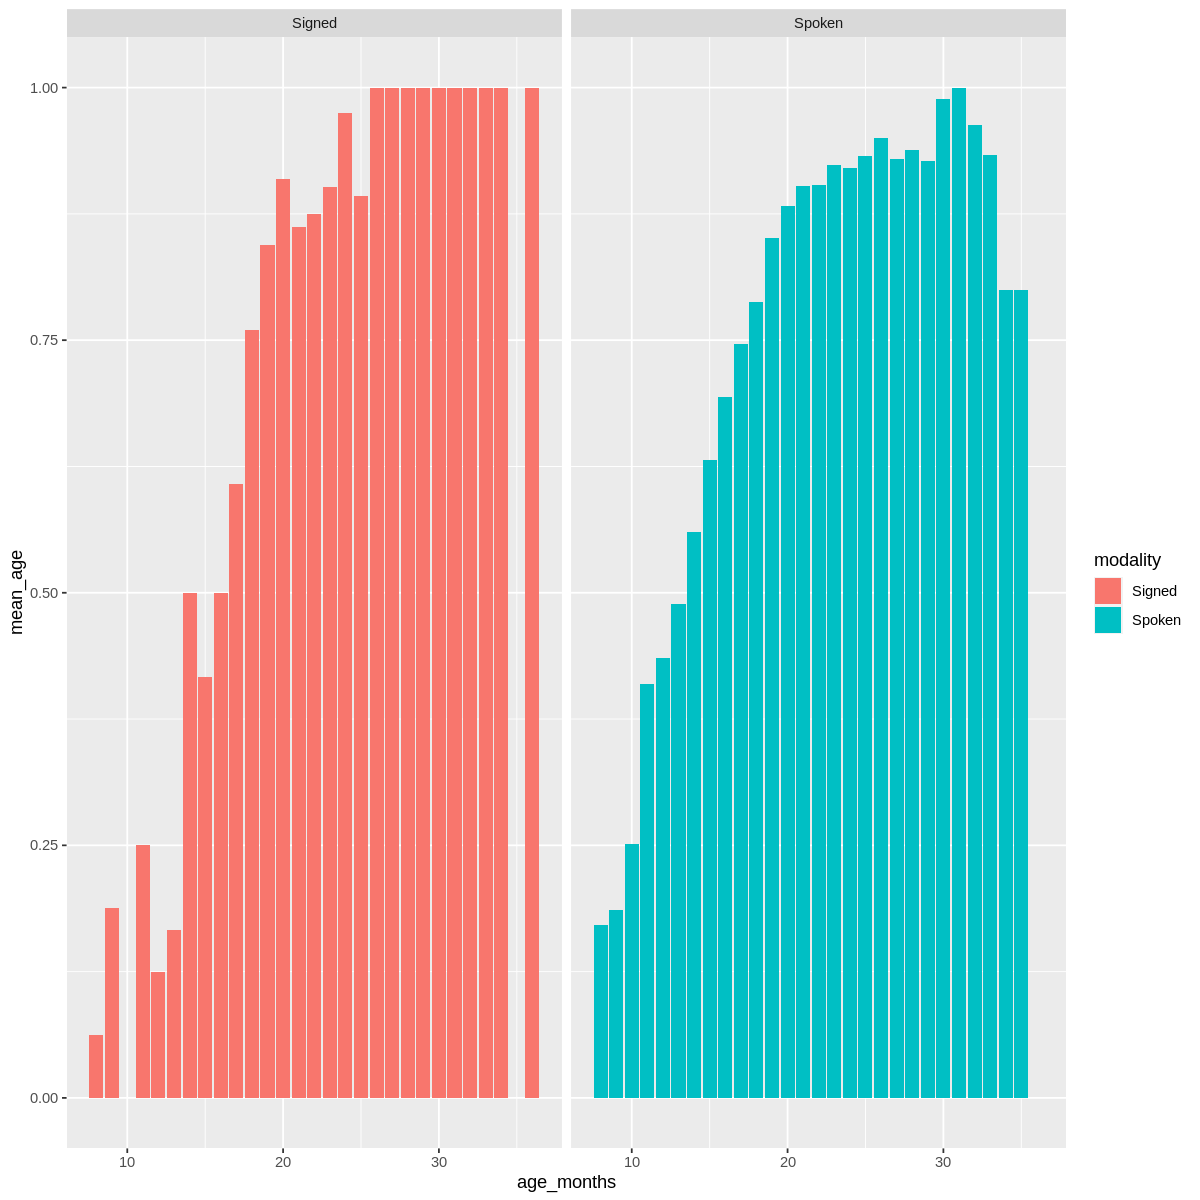

In [ ]:
# Now make a figure with this summarized data that shows a bar plot with 
# age_months on the x-axis and mean age_months on the y axis
# facet by modality or find another way to include the modality in the figure

mean_plot <- ggplot(mean_data, aes(x = age_months, y = mean_age, fill = modality)) + 
geom_bar(stat = "identity") + 
facet_wrap(~modality)
mean_plot

In [ ]:
# In words, after seeing your summary table and figure, do you think babies learning 
# signed languages produce ball earlier or later than those learning a spoken language?

### Problem 8 - Ball by language

Two years (24 months) is known as the "50 word stage" because most children produce about 50 words by the time they turn two.  Ball is often one of these words in English!

In [ ]:
# use filter to see the proportion of 2-year-olds learning American English 
# that can say ball. We want to know only age 2 here.
prod_ball %>% filter(age_months == 24 & language == 'English (American)' & measure == 'produces' & uni_lemma == "ball")
# filter(prod_ball, language == "English (American)" & age_months == 24)

X,language,age_months,measure,uni_lemma,words,proportion
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
120,English (American),24,produces,ball,ball,0.9639794


It looks like most American English learning children can say ball as one of their 50 words! Let's find out if this is true across languages

In [ ]:
## Create another data.frame that shows the proportion of two 
## year olds who can say ball across all languages 
## arrange this data.frame to rank the languages such that  
## the highest proportion is at the top and lowest at the bottom
all_lan_ball <- prod_ball %>% filter(age_months == 24 & measure == 'produces' & uni_lemma == "ball")
all_lan_ball %>% arrange(desc(proportion))

X,language,age_months,measure,uni_lemma,words,proportion
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
5,American Sign Language,24,produces,ball,BALL,1.0000000
239,Hebrew,24,produces,ball,כדור,1.0000000
120,English (American),24,produces,ball,ball,0.9639794
139,English (Australian),24,produces,ball,ball,0.9605263
219,German,24,produces,ball,Ball,0.9514563
359,Norwegian,24,produces,ball,ball,0.9478114
45,Cantonese,24,produces,ball,波,0.9411765
268,Italian,24,produces,ball,palla,0.9294118
158,English (British),24,produces,ball,ball,0.9165897


In [ ]:
## Which language has the most children who can say ball at age 2? The least? 

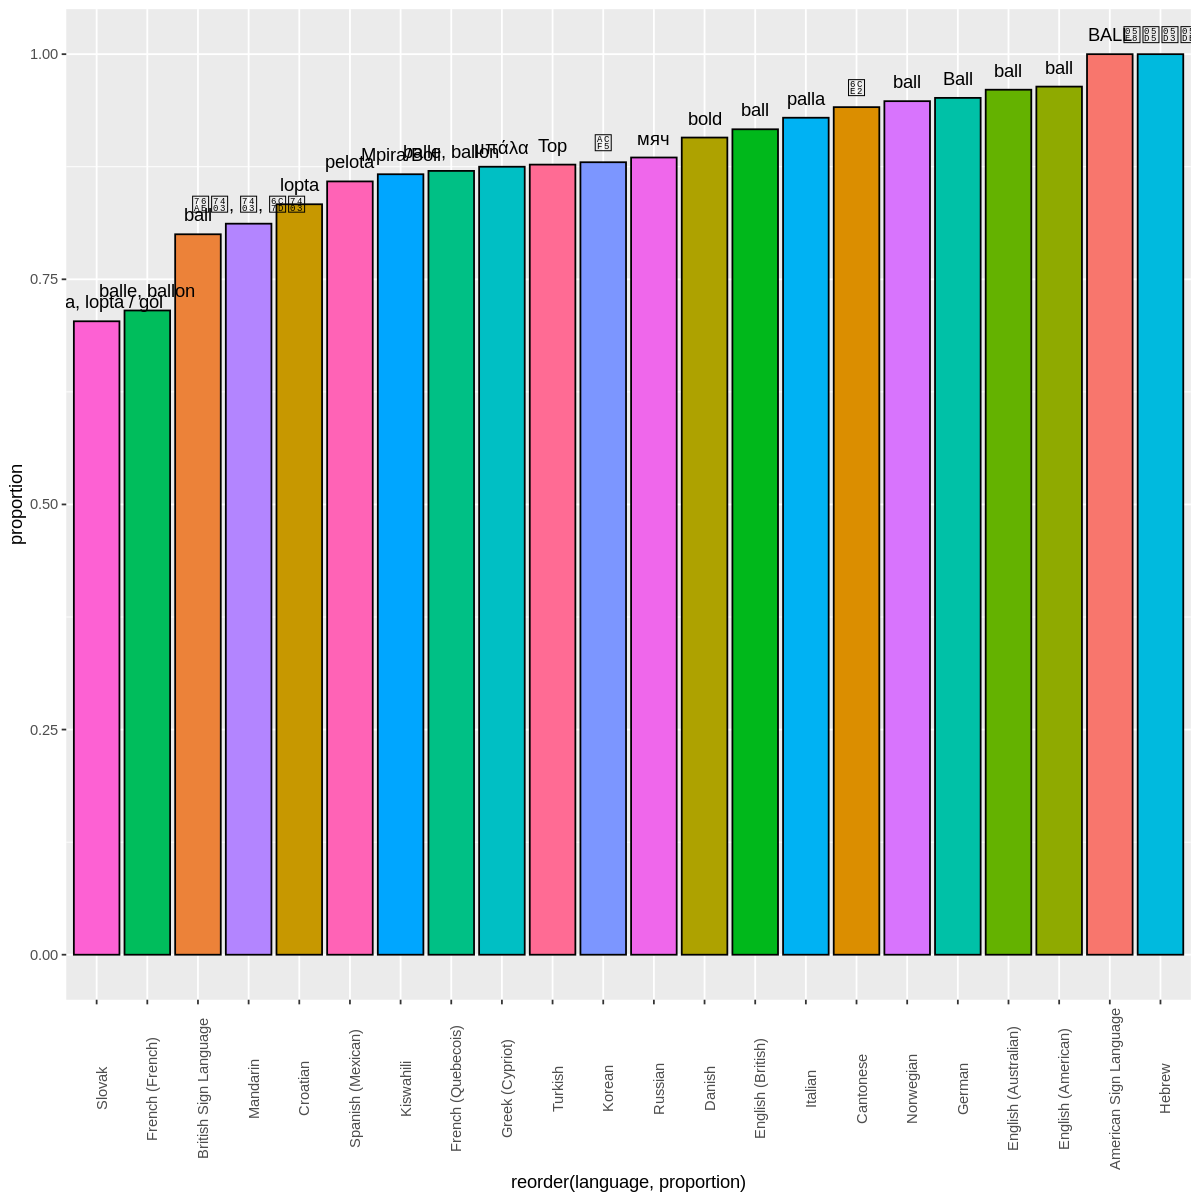

In [ ]:
## Create a bar plot that shows language on the x axis and proportion on
## the y axis, with each language a different color. As we did in class, 
## sort the x axis so it shows the languages in order of proportion 
## and include the word in the language above the bar. 

ggplot(all_lan_ball, aes(x = reorder(language, proportion), y = proportion, fill = language)) + 
geom_bar(stat = "identity", color = "black") +
theme(legend.position = "none") +
geom_text(aes(label = words), vjust = -1) +
theme(axis.text.x = element_text(angle = 90))


In [ ]:
## Do you have any hypotheses about why babies might be more likely to say
## ball by 2 in one language than another? 

### Problem 9 - Final Challenge (Optional)

In [ ]:
# Final challenge!
#
# We've already created a data.frame, prod_ball, of the proportion of children of a given
# age that produce the word "ball" for 23 different languages.
#
# Now, extend your answer to find the minimum age at which 90% of children
# produce or understand the word dog for each language.
#
# Bonus points if your answer is in the form of a nice looking bar graph!

prod_ball %>% filter(uni_lemma == "ball" & proportion >= 0.9) %>% group_by(language) %>% slice(which.min(age_months))

X,language,age_months,measure,uni_lemma,words,proportion
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
3,American Sign Language,21,produces,ball,BALL,1.0000000
23,British Sign Language,20,produces,ball,ball,0.9090909
44,Cantonese,23,produces,ball,波,0.9189189
1045,Croatian,15,understands,ball,lopta,0.9583333
91,Danish,24,produces,ball,bold,0.9074074
1096,English (American),14,understands,ball,ball,0.9153846
135,English (Australian),20,produces,ball,ball,0.9871795
1139,English (British),19,understands,ball,ball,0.9357798
210,French (Quebecois),28,produces,ball,"balle, ballon",0.9339623


In [ ]:
prod_ball %>% filter(uni_lemma == "ball" & proportion >= 0.9) %>% group_by(language) %>% slice_min(order_by = age_months)

X,language,age_months,measure,uni_lemma,words,proportion
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
3,American Sign Language,21,produces,ball,BALL,1.0000000
989,American Sign Language,21,understands,ball,BALL,1.0000000
23,British Sign Language,20,produces,ball,ball,0.9090909
1009,British Sign Language,20,understands,ball,ball,0.9090909
44,Cantonese,23,produces,ball,波,0.9189189
1030,Cantonese,23,understands,ball,波,0.9189189
1045,Croatian,15,understands,ball,lopta,0.9583333
91,Danish,24,produces,ball,bold,0.9074074
1077,Danish,24,understands,ball,bold,0.9074074
